In [1]:
import pandas as pd
import nltk
import re

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')

nltk.download('punkt')

nltk.download('wordnet')

nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
import plotly.express as px

In [3]:
df_Industry = pd.read_csv('GreenBiz.csv')
VAD = pd.read_csv('Warriner_rescale.csv')

In [4]:
# Define a list of stopwords to remove
stop_words = set(stopwords.words('english'))

# Define lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [5]:

def preprocess_text(text):
    if isinstance(text, str):
        # Remove punctuation and special characters
        text = text.replace('\n', ' ').replace('\r', '')
        text = re.sub('[^A-Za-z0-9 ]+', '', text)

        # Convert to lowercase
        text = text.lower()

           # Tokenize the text
        words = word_tokenize(text)
    
        # Remove stop words
        words = [w for w in words if not w in stop_words]
    
        # Lemmatize or stem the words
        words = [lemmatizer.lemmatize(w) for w in words]
        #words = [stemmer.stem(w) for w in words]
    
        # Rejoin the words into a single string
        text = ' '.join(words)
    

        return text
    else:
        return ''


In [6]:
def tokenised(text):
    if isinstance(text, str):
        # Tokenize the text
        words = word_tokenize(text)
    
        return words
    else:
        return ''

In [7]:
# Apply the preprocessing function to the DataFrame
df_Industry['Preprocessed Text'] = df_Industry['body'].apply(preprocess_text)


In [8]:
df_Industry['tokenised'] = df_Industry['Preprocessed Text'].apply(tokenised)

In [9]:
import ast

In [10]:
vad_list = []
def get_vad(series):
    for i in series: # iterate throguh each item in the df series
        scores = VAD[VAD['Word'].isin(i)][['V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum']]
        vad_list.append(scores.mean().tolist())
    
        
get_vad(df_Industry['tokenised'])

In [11]:
#create a new DataFrame with the list as columns
df1 = pd.DataFrame(vad_list, columns=['valence', 'arousal', 'dominance'])

# display the DataFrame
df_Industry['valence'] = df1['valence']
df_Industry['arousal'] = df1['arousal']
df_Industry['dominance'] = df1['dominance']

In [12]:
# Remove rows with empty lists in 'column_name' in df_Industry
df_Industry = df_Industry[df_Industry['tokenised'].apply(lambda x: x != [])]


In [13]:
fig = px.scatter_3d(df_Industry, x='valence', y='arousal', z='dominance')
fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

In [14]:
fig1 = px.scatter(df_Industry, x='valence', y='arousal')
fig1

In [15]:
fig3 = px.scatter(df_Industry, x='arousal', y='dominance')
fig3

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from IPython.display import IFrame
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from scipy.spatial import distance
from sklearn.decomposition import PCA

In [17]:
vectorizer = TfidfVectorizer(input = 'content', strip_accents = 'ascii', stop_words = 'english')

In [18]:
data_I= df_Industry
data_I = data_I.drop_duplicates(subset = ['body']).reset_index(drop = True)
data_I = data_I.reset_index(drop=True)

In [19]:
text_I = [i for i in data_I['body']]

In [20]:
#vectorsI = vectorizer.fit_transform(text_I)

In [21]:
#vectorsI = vectorsI.todense().tolist()

In [22]:
#df_tmI = pd.DataFrame(vectorsI,columns=vectorizer.get_feature_names_out())

In [23]:
#pca_I = PCA(n_components = 3)
#comps_I = pca_I.fit_transform(df_tmI)
#pc_df_I = pd.DataFrame(data = comps_I, columns = ['PC'+str(i) for i in range(1, comps_I.shape[1]+1)])

In [24]:
#clustering_I = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(df_tmI)

In [25]:
#kmeans_I = KMeans(n_clusters=5, random_state=0, n_init=10).fit(df_tmI)

In [26]:
#df_all_I = pd.concat([df_tmI, pc_df_I], axis = 1)
#df_all_I['clusters_ag'] = [str(i) for i in clustering_I.labels_]
#df_all_I['clusters_knn'] = [str(i) for i in kmeans_I.labels_]
#df_all_I['data_text'] = data_I['heading']


In [27]:
#fig_I = px.scatter_3d(df_all_I[0:2000], x='PC1', y='PC2', z='PC3', color='clusters_ag', hover_data = ['data_text'])
#fig_I.update_traces(marker=dict(size = 5, line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

# Guardian stuff

In [28]:
df_Left = pd.read_csv('Guardian.csv')

In [29]:
df_Left['Preprocessed Text'] = df_Left['article_body'].apply(preprocess_text)

In [30]:
df_Left['tokenised'] = df_Left['Preprocessed Text'].apply(tokenised)

In [31]:
vad_list2 = []
def get_vad(series):
    for i in series: # iterate throguh each item in the df series
        scores = VAD[VAD['Word'].isin(i)][['V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum']]
        vad_list2.append(scores.mean().tolist())
    
        
get_vad(df_Left['tokenised'])

In [32]:
#create a new DataFrame with the list as columns
df2 = pd.DataFrame(vad_list2, columns=['valence', 'arousal', 'dominance'])

# display the DataFrame
df_Left['valence'] = df2['valence']
df_Left['arousal'] = df2['arousal']
df_Left['dominance'] = df2['dominance']

In [33]:
df_Left

,Unnamed: 0,headline,date,author,content_url,article_body,Preprocessed Text,tokenised,valence,arousal,dominance
0,0,Solar panels could be a lifesaver for public h...,2023-04-02T15:00:25+0000,Unknown,https://www.theguardian.com/environment/2023/a...,Natalie Rabey doesn’t know how much time she h...,natalie rabey doesnt know much time left know ...,"[natalie, rabey, doesnt, know, much, time, lef...",0.580569,0.373472,0.573446
1,1,Every household will go on a journey of electr...,2023-03-31T14:00:26+0000,Unknown,https://www.theguardian.com/environment/2023/a...,"In 2021, the publisher of my book The Big Swit...",2021 publisher book big switch arranged hectic...,"[2021, publisher, book, big, switch, arranged,...",0.596397,0.368746,0.572488
2,2,Solar is now viable even in rainy climes – so ...,2023-03-31T05:00:16+0000,Unknown,https://www.theguardian.com/news/2023/mar/31/s...,"It may seem unlikely with the dark, rainy skie...",may seem unlikely dark rainy sky many part las...,"[may, seem, unlikely, dark, rainy, sky, many, ...",0.580962,0.400250,0.555923
3,3,The Guardian view on Rishi Sunak’s energy plan...,2023-03-30T17:30:03+0000,Unknown,https://www.theguardian.com/commentisfree/2023...,To say that Rishi Sunak’s government has chose...,say rishi sunaks government chosen path climat...,"[say, rishi, sunaks, government, chosen, path,...",0.509594,0.398989,0.543248
4,4,UK energy strategy casts doubt on Drax’s carbo...,2023-03-30T15:44:34+0000,Unknown,https://www.theguardian.com/business/2023/mar/...,The energy company Drax will immediately enter...,energy company drax immediately enter talk gov...,"[energy, company, drax, immediately, enter, ta...",0.562792,0.365921,0.562632
...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,Large fall in UK greenhouse gas emissions of o...,2015-03-26T13:05:01+0000,Unknown,https://www.theguardian.com/environment/2015/m...,The UK’s greenhouse gas emissions plunged by 8...,uk greenhouse gas emission plunged 84 last yea...,"[uk, greenhouse, gas, emission, plunged, 84, l...",0.558048,0.384341,0.554649
2996,2996,Costa Rica uses only renewable energy for firs...,2015-03-26T12:16:00+0000,Unknown,https://www.theguardian.com/world/video/2015/m...,No content found,content found,"[content, found]",0.712500,0.271250,0.615000
2997,2997,UK households used 14% less energy last year b...,2015-03-26T11:47:46+0000,Unknown,https://www.theguardian.com/environment/2015/m...,British households used 14% less energy in 201...,british household used 14 le energy 2014 avera...,"[british, household, used, 14, le, energy, 201...",0.539399,0.377971,0.545925
2998,2998,The real villains in Australia's renewables de...,2015-03-26T01:41:10+0000,Unknown,https://www.theguardian.com/commentisfree/2015...,Industry minister Ian Macfarlane would not hav...,industry minister ian macfarlane would believe...,"[industry, minister, ian, macfarlane, would, b...",0.549950,0.394164,0.564786


In [34]:
# Filter the data based on valence values up to 0.65
df_filtered = df_Left[df_Left['valence'] <= 0.65]

# Plot the filtered data
fig2 = px.scatter_3d(df_filtered, x='valence', y='arousal', z='dominance')
fig2.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig2.show()


In [35]:
fig2 = px.scatter(df_filtered, x='valence', y='arousal')
fig2

In [36]:
fig4 = px.scatter(df_filtered, x='arousal', y='dominance')
fig4

In [37]:
#import plotly.graph_objects as go

#fig1 = go.Figure()
#fig1.add_trace(go.Scatter3d(x=df_Industry['valence'], y=df_filtered1['arousal'], z=df_filtered1['dominance'], mode='markers', marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey'))))
#fig1.update_layout(title='Dataset 1')

#fig2 = go.Figure()
#fig2.add_trace(go.Scatter3d(x=df_filtered['valence'], y=df_filtered2['arousal'], z=df_filtered2['dominance'], mode='markers', marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey'))))
#fig2.update_layout(title='Dataset 2')

#fig = make_subplots(rows=1, cols=2, subplot_titles=('Dataset 1', 'Dataset 2'))
#fig.add_trace(fig1.data[0], row=1, col=1)
#fig.add_trace(fig2.data[0], row=1, col=2)

#fig.update_layout(width=1000, height=500, title='Comparison of Datasets')
#fig.show()


In [38]:
#from sklearn.cluster import AgglomerativeClustering
#from IPython.display import IFrame
#from sklearn.cluster import KMeans
#from sklearn.cluster import AffinityPropagation
#from scipy.spatial import distance
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import PCA

In [39]:
#vectorizer = TfidfVectorizer(input = 'content', strip_accents = 'ascii', stop_words = 'english')

In [40]:
data_g = df_Left
data_g = data_g.drop_duplicates(subset = ['article_body']).reset_index(drop = True)
data_g = data_g.reset_index(drop=True)

In [41]:
text_g = [i for i in data_g['article_body']]

In [42]:
#vectors = vectorizer.fit_transform(text_g)

In [43]:
#vectors = vectors.todense().tolist()

In [44]:
#df_tmg = pd.DataFrame(vectors,columns=vectorizer.get_feature_names_out())

In [45]:
#pca_g = PCA(n_components = 3)
#comps_g = pca_g.fit_transform(df_tmg)
#pc_df_g = pd.DataFrame(data = comps_g, columns = ['PC'+str(i) for i in range(1, comps_g.shape[1]+1)])

In [46]:
#clustering_g = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(df_tmg)

In [47]:
#kmeans_g = KMeans(n_clusters=5, random_state=0, n_init=10).fit(df_tmg)

In [48]:
#df_all_guardian = pd.concat([df_tmg, pc_df_g], axis = 1)
#df_all_guardian['clusters_ag'] = [str(i) for i in clustering_g.labels_]
#df_all_guardian['clusters_knn'] = [str(i) for i in kmeans_g.labels_]
#df_all_guardian['data_text'] = data_g['headline']

In [49]:
#fig_guardian = px.scatter_3d(df_all_guardian[0:2000], x='PC1', y='PC2', z='PC3', color='clusters_ag', hover_data = ['data_text'])
#fig_guardian.update_traces(marker=dict(size = 5, line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

# Correlation between  Left-Wing Articles and Industry 

In [50]:
from scipy.stats import pearsonr

# Load the two datasets into dataframes
df1 = df_Industry
df2 = df_filtered

# Calculate the Pearson correlation coefficient between the mean scores for the two datasets
corr, p_value = pearsonr(df1[['valence', 'arousal', 'dominance']].mean(), df2[['valence', 'arousal', 'dominance']].mean())

# Print the correlation coefficient and p-value
print('Correlation Coefficient:', corr)
print('P-value:', p_value)


Correlation Coefficient: 0.999990625574649
P-value: 0.0027565621437538987


# Correlation between Left-wing Articles and Reddit

In [51]:
import pandas as pd
from scipy.stats import pearsonr

# Load the two datasets into dataframes
df3 = pd.read_csv('RedditVAD.csv')


# Calculate the Pearson correlation coefficient between the mean scores for the two datasets
corr, p_value = pearsonr(df2[['valence', 'arousal', 'dominance']].mean(), df3[['valence', 'arousal', 'dominance']].mean())

# Print the correlation coefficient and p-value
print('Correlation Coefficient:', corr)
print('P-value:', p_value)


Correlation Coefficient: 0.9960642973734852
P-value: 0.05650004579432665


# Correlation between all articles and reddit

In [52]:
df1_cols = df1[['valence','arousal','dominance']]
df2_cols = df2[['valence','arousal','dominance']]

# concatenate selected columns
result = pd.concat([df1_cols, df2_cols], axis=0)



In [53]:
# Calculate the Pearson correlation coefficient between the mean scores for the two datasets
corr, p_value = pearsonr(df3[['valence', 'arousal', 'dominance']].mean(), result[['valence', 'arousal', 'dominance']].mean())

# Print the correlation coefficient and p-value
print('Correlation Coefficient:', corr)
print('P-value:', p_value)

Correlation Coefficient: 0.9962565777725146
P-value: 0.055101712978145506


# Correlation Between Industry and Reddit 

In [54]:
# Calculate the Pearson correlation coefficient between the mean scores for the two datasets
corr, p_value = pearsonr(df1[['valence', 'arousal', 'dominance']].mean(), df3[['valence', 'arousal', 'dominance']].mean())

# Print the correlation coefficient and p-value
print('Correlation Coefficient:', corr)
print('P-value:', p_value)

Correlation Coefficient: 0.9964387419380553
P-value: 0.053743483650573534


# Similarity 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define two datasets of articles
dataset1 = df_Industry['Preprocessed Text']
dataset2 = df_filtered['Preprocessed Text']


In [56]:
# Concatenate the text columns from both dataframes
corpus = pd.concat([dataset1, dataset2])

# Create a tf-idf vectorizer and transform the corpus
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

# Calculate the cosine similarity between each pair of articles
similarity_matrix = cosine_similarity(tfidf)

# Extract the similarity scores between the articles in the two dataframes
num_articles_df1 = len(df1)
similarity_scores = similarity_matrix[num_articles_df1:, :num_articles_df1]

# Calculate the mean similarity score between the two dataframes
mean_similarity_score = similarity_scores.mean()

# Print the mean similarity score
print(f"Mean similarity score: {mean_similarity_score}")

Mean similarity score: 0.05172373143950315


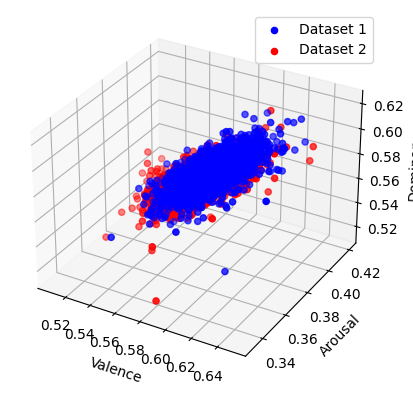

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# assuming you have two dataframes: df1 and df2, each with columns "Valence", "Arousal", and "Dominance"

# create figure and axes objects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot df1
ax.scatter(df1['valence'], df1['arousal'], df1['dominance'], c='b', label='Dataset 1')

# plot df2
ax.scatter(df2['valence'], df2['arousal'], df2['dominance'], c='r', label='Dataset 2')

# set axis labels and legend
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.legend()

# show the plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1d6e731-23c5-4a52-9e42-0c1452e92996' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>